# 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_df = pd.read_csv(r"/Users/imee/Downloads/Dataset.csv", header=None, names=["Data"])

dataset_df.drop(index=0, inplace=True)


dataset_df['Data'] = dataset_df['Data'].astype(int)


ranges = [140, 150, 160, 170, 180, 190, 200, 210]
range_boundary = [x - 0.5 for x in ranges[:-1]] + [ranges[-1] + 0.5]

# Continuous intervals (-0.5 shift)
dataset_cut = pd.cut(dataset_df['Data'], bins=range_boundary)
dataset_cut = dataset_cut.value_counts().sort_index().to_frame().reset_index()
dataset_cut.columns = ['Interval', 'Frequency']

# Add cumulative frequencies
dataset_cut['Cumulative Frequency =>'] = dataset_cut['Frequency'].cumsum()
dataset_cut['Cumulative Frequency <='] = dataset_cut.loc[::-1, 'Frequency'].cumsum()[::-1]

# Add Class Marks (midpoints)
dataset_cut['Class Mark'] = dataset_cut['Interval'].apply(lambda x: (x.left + x.right) / 2)

print(dataset_cut)

         Interval  Frequency  Cumulative Frequency =>  \
0  (139.5, 149.5]         45                       45   
1  (149.5, 159.5]        291                      336   
2  (159.5, 169.5]        106                      442   
3  (169.5, 179.5]         43                      485   
4  (179.5, 189.5]         11                      496   
5  (189.5, 199.5]          2                      498   
6  (199.5, 210.5]          2                      500   

   Cumulative Frequency <= Class Mark  
0                      500      144.5  
1                      455      154.5  
2                      164      164.5  
3                       58      174.5  
4                       15      184.5  
5                        4      194.5  
6                        2      205.0  


# 2

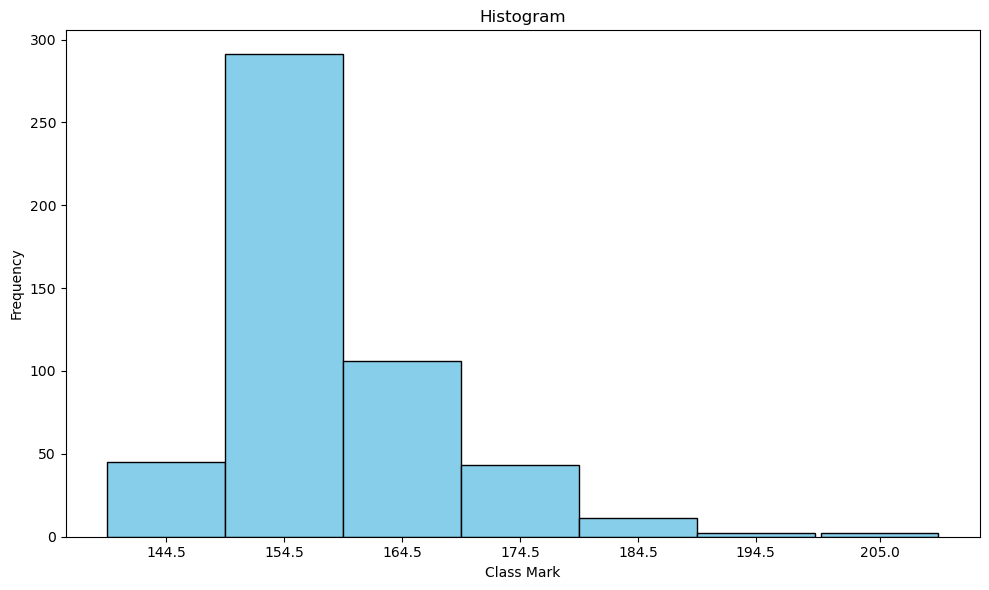

In [5]:
dataset_cut.columns = ['Range', 'Frequency', 'Cumulative Frequency =>', 'Cumulative Frequency <=','Class Mark']


bins = dataset_cut['Range'].astype(str)
frequencies = dataset_cut['Frequency']


plt.figure(figsize=(10, 6))
plt.bar(dataset_cut['Class Mark'], dataset_cut['Frequency'], 
        color='skyblue', edgecolor='black', width=10)  # width ~ class size
plt.title('Histogram')
plt.xlabel('Class Mark')
plt.ylabel('Frequency')
plt.xticks(dataset_cut['Class Mark'])
plt.tight_layout()
plt.show()


# 3

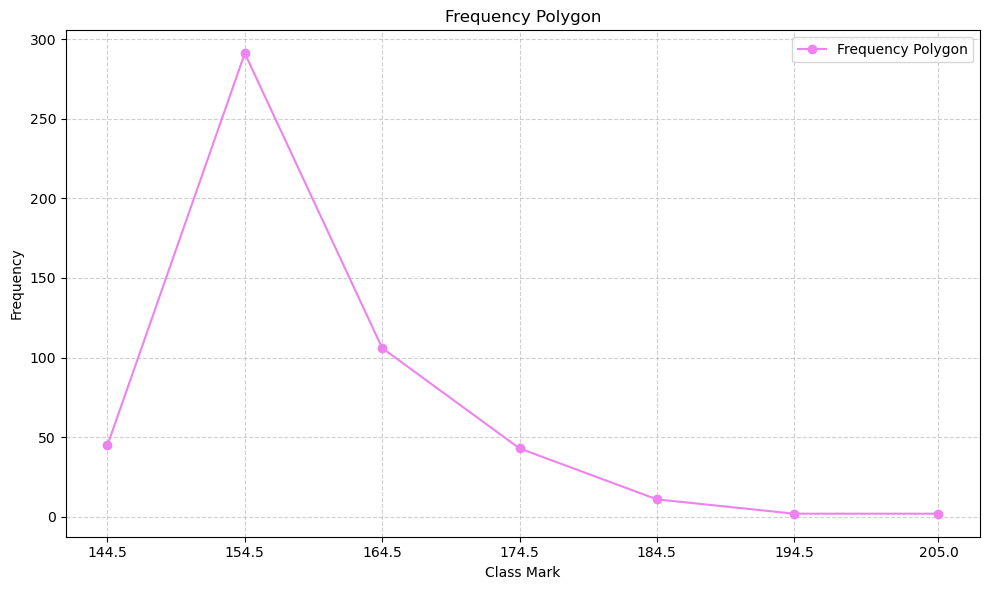

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_cut['Class Mark'], dataset_cut['Frequency'], 
         marker='o', linestyle='-', color='violet', label='Frequency Polygon')

plt.title('Frequency Polygon')
plt.xlabel('Class Mark')
plt.ylabel('Frequency')
plt.xticks(dataset_cut['Class Mark'])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# 4

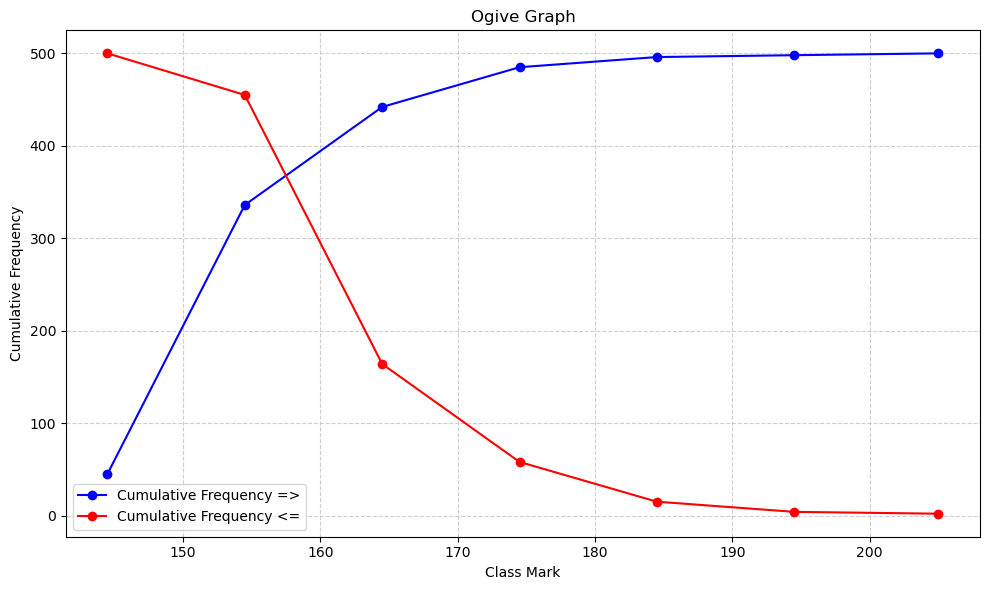

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_cut['Class Mark'], dataset_cut['Cumulative Frequency =>'], 
         color='green', marker='o', linestyle='-', label='Cumulative Frequency =>')
plt.plot(dataset_cut['Class Mark'], dataset_cut['Cumulative Frequency <='], 
         color='red', marker='o', linestyle='-', label='Cumulative Frequency <=')
plt.title('Ogive Graph')
plt.xlabel('Class Mark')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()